In [1]:
import torch
from torch.distributions import RelaxedOneHotCategorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.functional as F

loss: 1.6330612897872925
loss: 1.5801031589508057
loss: 1.5677493810653687
loss: 1.467987060546875
loss: 1.4565150737762451
loss: 1.3994848728179932
loss: 1.3807740211486816
loss: 1.247685432434082
loss: 1.231692910194397
loss: 1.2193355560302734


<BarContainer object of 5 artists>

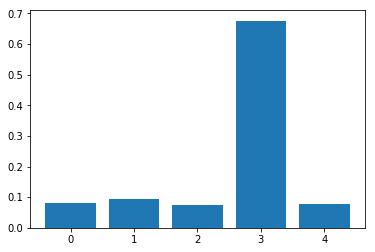

In [2]:
TEMPERATURE = 10.0
TARGET = torch.tensor([3])

loss_fn = torch.nn.CrossEntropyLoss()

logits = torch.nn.Parameter(torch.ones(5))
optimizer = torch.optim.Adam([logits], lr=1e-2)

output_dist = RelaxedOneHotCategorical(TEMPERATURE, logits=logits)

for step in range(1000):
    optimizer.zero_grad()
    output_dist = RelaxedOneHotCategorical(TEMPERATURE, logits=logits)
    loss = loss_fn(output_dist.rsample()[None, :], TARGET)
    loss.backward()
    optimizer.step()
    if step % 100 == 0:
        print('loss: {}'.format(loss))

samples = output_dist.sample([1]).detach().numpy()
plt.bar(np.arange(5), samples.mean(axis=0))


In [10]:
TEMPERATURE = 0.9
TARGET = torch.tensor([3])
logits = torch.nn.Parameter(torch.randn(5))
optimizer = torch.optim.Adam([logits], lr=1e-2)

for step in range(1000):
    optimizer.zero_grad()
    
    syllable_logprobs = # initial guess

    for t in range(T):
        syllable_dist = RelaxedOneHotCategorical(TEMPERATURE, logits=syllable_logprobs)
        inp = syllable_dist.rsample()
        syllable_logprobs = network(inp)
        
    loss = loss_fn(output_dist.rsample()[None, :], TARGET)
    loss.backward()
    optimizer.step()
    if step % 100 == 0:
        print('loss: {}'.format(loss))

samples = output_dist.sample([100]).detach().numpy()
plt.bar(np.arange(5), samples.mean(axis=0))